In [2]:
import os
from PIL import Image
import numpy as np

class Frame:
    def __init__(self, data_type, room_label, sequence, file_name, depth_image_path, color_image_path, pose):
        self.data_type = data_type
        self.room_label = room_label
        self.sequence = sequence
        self.file_name = file_name
        self.depth_image_path = depth_image_path
        self.color_image_path = color_image_path
        self.pose = pose

def parse_pose_file(pose_file_path):
    with open(pose_file_path, 'r') as file:
        pose = [list(map(float, line.strip().split())) for line in file]
    return pose

def create_frame_objects(data_path, room_name, data_type):
    frames = []
    # Traverse through each sequence folder
    for seq_folder in os.listdir(data_path):
        seq_path = os.path.join(data_path, seq_folder)
        if os.path.isdir(seq_path):
            print(f"Processing sequence: {seq_folder} in {room_name} ({data_type})")
            for frame_file in os.listdir(seq_path):
                if frame_file.endswith('.color.png'):
                    frame_name = frame_file.split('.')[0]
                    depth_image_path = os.path.join(seq_path, f"{frame_name}.depth.png")
                    color_image_path = os.path.join(seq_path, f"{frame_name}.color.png")
                    pose_file_path = os.path.join(seq_path, f"{frame_name}.pose.txt")

                    if os.path.exists(depth_image_path) and os.path.exists(pose_file_path):
                        print(f"Reading frame: {frame_name}")
                        pose = parse_pose_file(pose_file_path)
                        frame = Frame(data_type, room_name, seq_folder, frame_name, depth_image_path, color_image_path, pose)
                        frames.append(frame)
    return frames

def create_data_structure(data_folder):
    train_data = []
    test_data = []
    room_names = ['chess', 'fire', 'heads', 'office', 'pumpkin', 'redkitchen', 'stairs']
    
    for room_name in room_names:
        print(f"Processing room: {room_name}")
        test_path = os.path.join(data_folder, room_name, 'test')
        train_path = os.path.join(data_folder, room_name, 'train')
        
        train_data.extend(create_frame_objects(train_path, room_name, 'train'))
        test_data.extend(create_frame_objects(test_path, room_name, 'test'))
        
    return train_data, test_data

# Replace 'your_path_to_data_folder' with the path to the 'data' folder on your local system
your_path_to_data_folder = 'data'
train_data, test_data = create_data_structure(your_path_to_data_folder)





Processing room: chess
Processing sequence: seq-01 in chess (train)
Reading frame: frame-000000
Reading frame: frame-000001
Reading frame: frame-000002
Reading frame: frame-000003
Reading frame: frame-000004
Reading frame: frame-000005
Reading frame: frame-000006
Reading frame: frame-000007
Reading frame: frame-000008
Reading frame: frame-000009
Reading frame: frame-000010
Reading frame: frame-000011
Reading frame: frame-000012
Reading frame: frame-000013
Reading frame: frame-000014
Reading frame: frame-000015
Reading frame: frame-000016
Reading frame: frame-000017
Reading frame: frame-000018
Reading frame: frame-000019
Reading frame: frame-000020
Reading frame: frame-000021
Reading frame: frame-000022
Reading frame: frame-000023
Reading frame: frame-000024
Reading frame: frame-000025
Reading frame: frame-000026
Reading frame: frame-000027
Reading frame: frame-000028
Reading frame: frame-000029
Reading frame: frame-000030
Reading frame: frame-000031
Reading frame: frame-000032
Reading 

Room: chess, Sequence: seq-01, Frame: frame-000000, Data type: train
Depth Image Path: data\chess\train\seq-01\frame-000000.depth.png
Color Image Path: data\chess\train\seq-01\frame-000000.color.png
Pose: [[0.99935108, -0.015576084, 0.031508941, -0.12323361], [0.0092375092, 0.98130137, 0.19211653, -1.1206967], [-0.033912845, -0.19170459, 0.98083067, -0.98870575], [0.0, 0.0, 0.0, 1.0]]


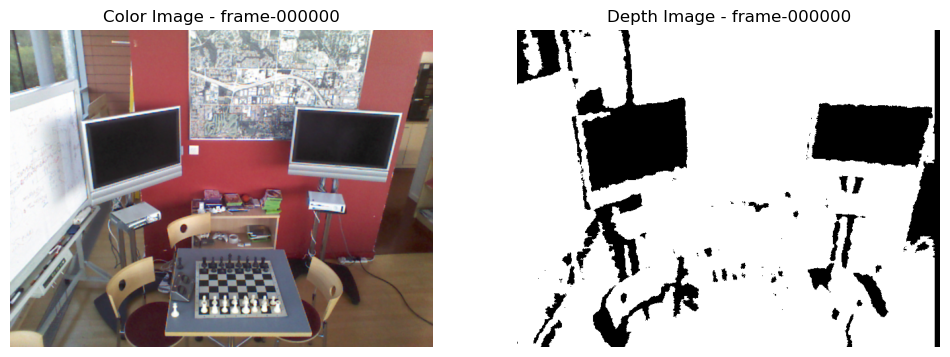

-----------------------------------------------
Room: chess, Sequence: seq-01, Frame: frame-000001, Data type: train
Depth Image Path: data\chess\train\seq-01\frame-000001.depth.png
Color Image Path: data\chess\train\seq-01\frame-000001.color.png
Pose: [[0.99900889, -0.019026889, 0.039456822, -0.13631822], [0.010958552, 0.98063052, 0.19542165, -1.1221372], [-0.042411759, -0.19479951, 0.97988963, -0.98854625], [0.0, 0.0, 0.0, 1.0]]


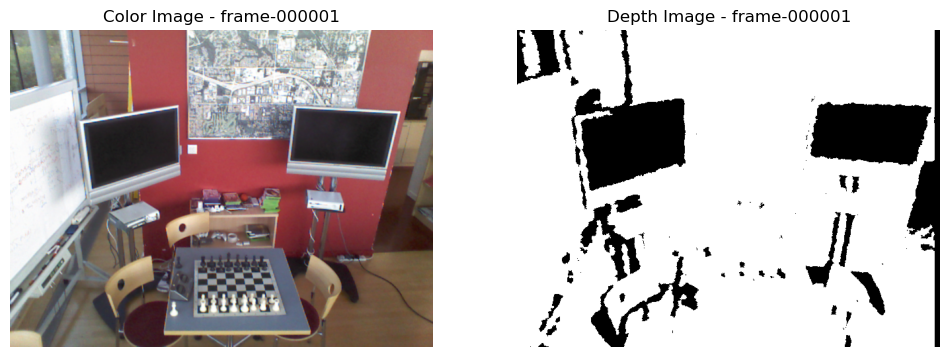

-----------------------------------------------
Room: chess, Sequence: seq-03, Frame: frame-000000, Data type: test
Depth Image Path: data\chess\test\seq-03\frame-000000.depth.png
Color Image Path: data\chess\test\seq-03\frame-000000.color.png
Pose: [[0.99704725, 0.028390523, 0.071089409, -0.051365793], [-0.052101094, 0.93205589, 0.35850239, -0.78486353], [-0.056082293, -0.36115384, 0.93079323, -0.70112866], [0.0, 0.0, 0.0, 1.0]]


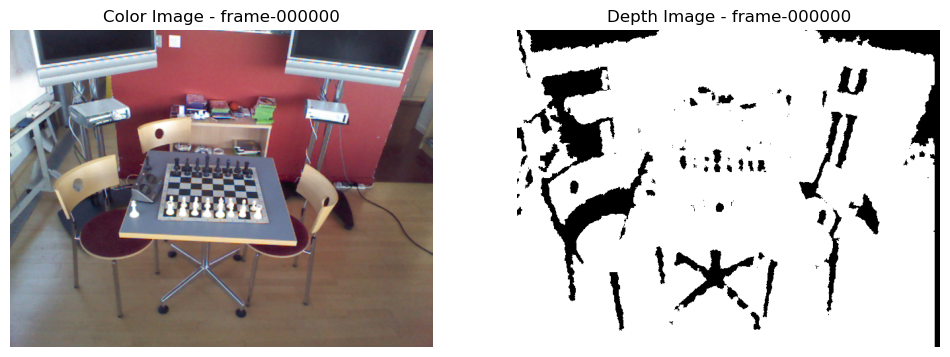

-----------------------------------------------
Room: chess, Sequence: seq-03, Frame: frame-000001, Data type: test
Depth Image Path: data\chess\test\seq-03\frame-000001.depth.png
Color Image Path: data\chess\test\seq-03\frame-000001.color.png
Pose: [[0.99720067, 0.027621193, 0.069214627, -0.051333815], [-0.050827429, 0.93130153, 0.36063918, -0.78257066], [-0.054499444, -0.36315382, 0.93010879, -0.69717884], [0.0, 0.0, 0.0, 1.0]]


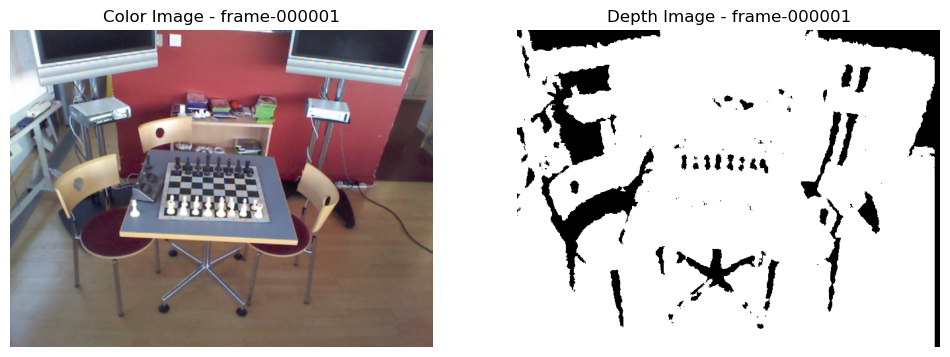

-----------------------------------------------
Total Train Frames: 22017
Total Test Frames: 14520


In [3]:
import matplotlib.pyplot as plt

def display_image(image_path):
    
    with Image.open(image_path).convert('RGB') as img:
        plt.imshow(img)
        plt.axis('off')

def display_image2(image_path):
    
    with Image.open(image_path) as img:
        plt.imshow(img, cmap='gray')  # 'cmap' parameter specifies that we want the image in grayscale
        plt.axis('off')  

def display_frame_images(frame):
 
        plt.figure(figsize=(12, 5))
        
        
        plt.subplot(1, 2, 1)
        plt.title(f"Color Image - {frame.file_name}")
        display_image(frame.color_image_path)
        
        plt.subplot(1, 2, 2)
        plt.title(f"Depth Image - {frame.file_name}")
        display_image2(frame.depth_image_path)
        
        plt.show()




for frame in train_data[:2] + test_data[:2]:
    print(f"Room: {frame.room_label}, Sequence: {frame.sequence}, Frame: {frame.file_name}, Data type: {frame.data_type}")
    print(f"Depth Image Path: {frame.depth_image_path}")
    print(f"Color Image Path: {frame.color_image_path}")
    print(f"Pose: {frame.pose}")
    display_frame_images(frame)
    print('-----------------------------------------------')

print(f"Total Train Frames: {len(train_data)}")
print(f"Total Test Frames: {len(test_data)}")


In [4]:

def check_frames(frames):
    missing_files = []
    invalid_poses = []

    for frame in frames:
        # Check for missing color or depth image files
        if not os.path.exists(frame.color_image_path) or not os.path.exists(frame.depth_image_path):
            missing_files.append(frame)
            continue  # Skip to the next frame if a file is missing

        # Check pose file for NaN values or if it doesn't exist
        try:
            pose_matrix = frame.pose
            if np.isnan(pose_matrix).any():  # Check if there are any NaN values in the pose matrix
                invalid_poses.append(frame)
        except IOError:  # This catches the case where the pose file doesn't exist
            missing_files.append(frame)
        except ValueError:  # This catches the case where the pose file has invalid contents (e.g., non-numeric values)
            invalid_poses.append(frame)

    return missing_files, invalid_poses

def report_issues(missing_files, invalid_poses, data_type):
    print(f"{data_type} Data:")
    print(f"Frames with missing color/depth images or pose.txt: {len(missing_files)}")
    for frame in missing_files:
        print(f"Missing file in frame: {frame.file_name}")

    print(f"Frames with invalid pose data: {len(invalid_poses)}")
    for frame in invalid_poses:
        print(f"Invalid pose data in frame: {frame.file_name}")
    print("---------------------------------------------------")

# Assuming train_data and test_data are your arrays of Frame objects
train_missing, train_invalid = check_frames(train_data)
test_missing, test_invalid = check_frames(test_data)

# Report the issues found
report_issues(train_missing, train_invalid, "Train")
report_issues(test_missing, test_invalid, "Test")


Train Data:
Frames with missing color/depth images or pose.txt: 0
Frames with invalid pose data: 0
---------------------------------------------------
Test Data:
Frames with missing color/depth images or pose.txt: 0
Frames with invalid pose data: 0
---------------------------------------------------


c:\Users\aycaaelifaktas\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] Belirtilen yordam bulunamadı'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


----------------------------------------------------------------------------------------------------
FOLD 0
----------------------------------------------------------------------------------------------------


c:\Users\aycaaelifaktas\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\aycaaelifaktas\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epochs Progress:   7%|▋         | 1/15 [10:04<2:21:04, 604.64s/it]

Epoch 1/15 - Train Loss: 0.0825, Validation Loss: 0.0037


Epochs Progress:  13%|█▎        | 2/15 [20:01<2:10:02, 600.20s/it]

Epoch 2/15 - Train Loss: 0.0064, Validation Loss: 0.0015


Epochs Progress:  20%|██        | 3/15 [30:02<2:00:05, 600.45s/it]

Epoch 3/15 - Train Loss: 0.0038, Validation Loss: 0.0008


Epochs Progress:  27%|██▋       | 4/15 [40:00<1:49:52, 599.36s/it]

Epoch 4/15 - Train Loss: 0.0026, Validation Loss: 0.0005


Epochs Progress:  33%|███▎      | 5/15 [52:09<1:47:40, 646.10s/it]

Epoch 5/15 - Train Loss: 0.0019, Validation Loss: 0.0004


Epochs Progress:  40%|████      | 6/15 [1:10:55<2:01:25, 809.46s/it]

Epoch 6/15 - Train Loss: 0.0017, Validation Loss: 0.0003


Epochs Progress:  47%|████▋     | 7/15 [1:23:48<1:46:20, 797.54s/it]

Epoch 7/15 - Train Loss: 0.0013, Validation Loss: 0.0003


Epochs Progress:  53%|█████▎    | 8/15 [1:34:06<1:26:22, 740.33s/it]

Epoch 8/15 - Train Loss: 0.0010, Validation Loss: 0.0002


Epochs Progress:  60%|██████    | 9/15 [1:46:32<1:14:12, 742.11s/it]

Epoch 9/15 - Train Loss: 0.0011, Validation Loss: 0.0002


Epochs Progress:  67%|██████▋   | 10/15 [1:56:27<58:03, 696.74s/it] 

Epoch 10/15 - Train Loss: 0.0008, Validation Loss: 0.0001


Epochs Progress:  73%|███████▎  | 11/15 [2:05:18<43:03, 645.85s/it]

Epoch 11/15 - Train Loss: 0.0009, Validation Loss: 0.0001


Epochs Progress:  80%|████████  | 12/15 [2:17:35<33:40, 673.53s/it]

Epoch 12/15 - Train Loss: 0.0007, Validation Loss: 0.0001


Epochs Progress:  87%|████████▋ | 13/15 [2:30:50<23:41, 710.52s/it]

Epoch 13/15 - Train Loss: 0.0006, Validation Loss: 0.0001


Epochs Progress:  93%|█████████▎| 14/15 [2:43:23<12:03, 723.33s/it]

Epoch 14/15 - Train Loss: 0.0007, Validation Loss: 0.0001


Epochs Progress: 100%|██████████| 15/15 [2:56:46<00:00, 707.12s/it]

Epoch 15/15 - Train Loss: 0.0005, Validation Loss: 0.0001
--------------------------------------------------


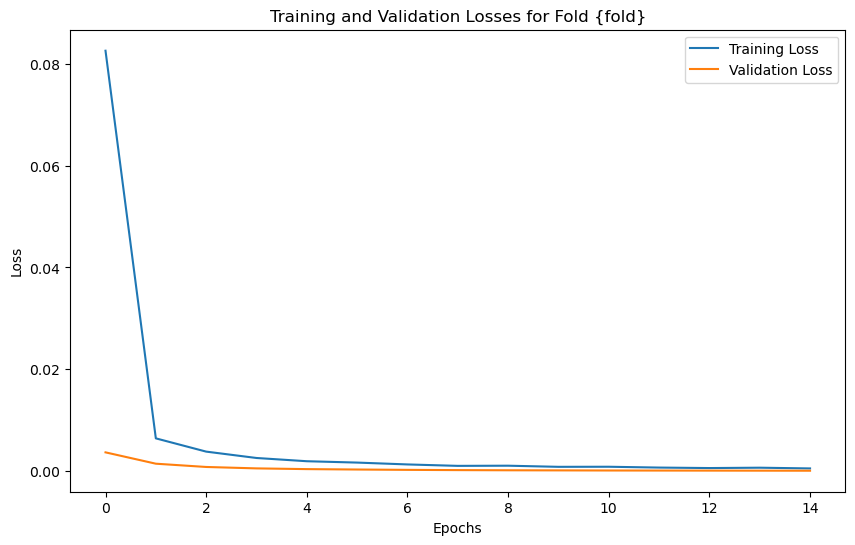

--------------------------------------------------
Training complete. Best Epoch: 15 with Validation Loss: 0.0001
Performance of the best model from fold 0 on the test data: Accuracy = 98.94%
--------------------------------------------------
----------------------------------------------------------------------------------------------------
FOLD 1
----------------------------------------------------------------------------------------------------


c:\Users\aycaaelifaktas\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\aycaaelifaktas\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epochs Progress:   7%|▋         | 1/15 [12:49<2:59:30, 769.29s/it]

Epoch 1/15 - Train Loss: 0.0855, Validation Loss: 0.0040


Epochs Progress:  13%|█▎        | 2/15 [25:10<2:43:08, 752.93s/it]

Epoch 2/15 - Train Loss: 0.0067, Validation Loss: 0.0015


Epochs Progress:  20%|██        | 3/15 [37:29<2:29:16, 746.35s/it]

Epoch 3/15 - Train Loss: 0.0042, Validation Loss: 0.0008


Epochs Progress:  27%|██▋       | 4/15 [46:40<2:02:40, 669.12s/it]

Epoch 4/15 - Train Loss: 0.0029, Validation Loss: 0.0005


Epochs Progress:  33%|███▎      | 5/15 [55:46<1:44:07, 624.72s/it]

Epoch 5/15 - Train Loss: 0.0022, Validation Loss: 0.0004


Epochs Progress:  40%|████      | 6/15 [1:04:50<1:29:35, 597.29s/it]

Epoch 6/15 - Train Loss: 0.0017, Validation Loss: 0.0003


Epochs Progress:  47%|████▋     | 7/15 [1:13:55<1:17:23, 580.43s/it]

Epoch 7/15 - Train Loss: 0.0013, Validation Loss: 0.0002


Epochs Progress:  53%|█████▎    | 8/15 [1:22:59<1:06:20, 568.64s/it]

Epoch 8/15 - Train Loss: 0.0012, Validation Loss: 0.0002


Epochs Progress:  60%|██████    | 9/15 [1:32:46<57:26, 574.42s/it]  

Epoch 9/15 - Train Loss: 0.0010, Validation Loss: 0.0002


Epochs Progress:  67%|██████▋   | 10/15 [1:42:41<48:24, 580.84s/it]

Epoch 10/15 - Train Loss: 0.0009, Validation Loss: 0.0001


Epochs Progress:  73%|███████▎  | 11/15 [1:52:41<39:06, 586.61s/it]

Epoch 11/15 - Train Loss: 0.0008, Validation Loss: 0.0001


Epochs Progress:  80%|████████  | 12/15 [2:02:38<29:29, 589.83s/it]

Epoch 12/15 - Train Loss: 0.0007, Validation Loss: 0.0001


Epochs Progress:  87%|████████▋ | 13/15 [2:12:38<19:46, 593.08s/it]

Epoch 13/15 - Train Loss: 0.0009, Validation Loss: 0.0001


Epochs Progress:  93%|█████████▎| 14/15 [2:22:39<09:55, 595.39s/it]

Epoch 14/15 - Train Loss: 0.0007, Validation Loss: 0.0001


Epochs Progress: 100%|██████████| 15/15 [2:32:41<00:00, 610.74s/it]

Epoch 15/15 - Train Loss: 0.0006, Validation Loss: 0.0001
--------------------------------------------------


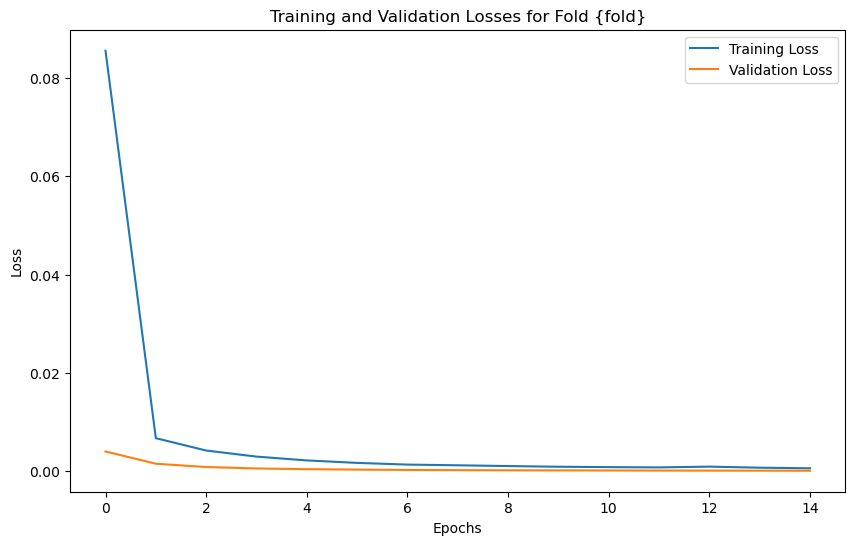

--------------------------------------------------
Training complete. Best Epoch: 15 with Validation Loss: 0.0001
Performance of the best model from fold 1 on the test data: Accuracy = 99.00%
--------------------------------------------------
----------------------------------------------------------------------------------------------------
FOLD 2
----------------------------------------------------------------------------------------------------


Epochs Progress:   7%|▋         | 1/15 [10:15<2:23:43, 615.94s/it]

Epoch 1/15 - Train Loss: 0.0830, Validation Loss: 0.0036


Epochs Progress:  13%|█▎        | 2/15 [20:17<2:11:35, 607.35s/it]

Epoch 2/15 - Train Loss: 0.0067, Validation Loss: 0.0014


Epochs Progress:  20%|██        | 3/15 [30:18<2:00:55, 604.66s/it]

Epoch 3/15 - Train Loss: 0.0038, Validation Loss: 0.0007


Epochs Progress:  27%|██▋       | 4/15 [40:20<1:50:39, 603.56s/it]

Epoch 4/15 - Train Loss: 0.0031, Validation Loss: 0.0005


Epochs Progress:  33%|███▎      | 5/15 [50:21<1:40:24, 602.50s/it]

Epoch 5/15 - Train Loss: 0.0019, Validation Loss: 0.0004


Epochs Progress:  40%|████      | 6/15 [1:00:21<1:30:15, 601.70s/it]

Epoch 6/15 - Train Loss: 0.0016, Validation Loss: 0.0003


Epochs Progress:  47%|████▋     | 7/15 [1:10:22<1:20:13, 601.66s/it]

Epoch 7/15 - Train Loss: 0.0015, Validation Loss: 0.0002


Epochs Progress:  53%|█████▎    | 8/15 [1:20:24<1:10:11, 601.69s/it]

Epoch 8/15 - Train Loss: 0.0011, Validation Loss: 0.0002


Epochs Progress:  60%|██████    | 9/15 [1:30:27<1:00:12, 602.03s/it]

Epoch 9/15 - Train Loss: 0.0010, Validation Loss: 0.0001


Epochs Progress:  67%|██████▋   | 10/15 [1:40:29<50:09, 601.92s/it] 

Epoch 10/15 - Train Loss: 0.0009, Validation Loss: 0.0001


Epochs Progress:  73%|███████▎  | 11/15 [1:50:27<40:02, 600.70s/it]

Epoch 11/15 - Train Loss: 0.0007, Validation Loss: 0.0001


Epochs Progress:  80%|████████  | 12/15 [2:00:28<30:03, 601.05s/it]

Epoch 12/15 - Train Loss: 0.0008, Validation Loss: 0.0001


Epochs Progress:  87%|████████▋ | 13/15 [2:10:29<20:01, 600.86s/it]

Epoch 13/15 - Train Loss: 0.0007, Validation Loss: 0.0001


Epochs Progress:  93%|█████████▎| 14/15 [2:20:27<10:00, 600.10s/it]

Epoch 14/15 - Train Loss: 0.0010, Validation Loss: 0.0001


Epochs Progress: 100%|██████████| 15/15 [2:30:36<00:00, 602.45s/it]

Epoch 15/15 - Train Loss: 0.0006, Validation Loss: 0.0001
--------------------------------------------------


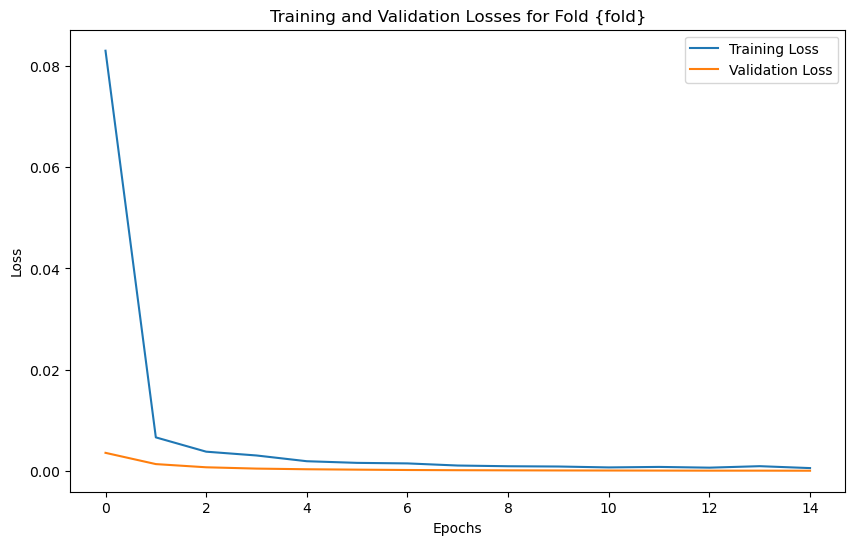

--------------------------------------------------
Training complete. Best Epoch: 15 with Validation Loss: 0.0001
Performance of the best model from fold 2 on the test data: Accuracy = 99.11%
--------------------------------------------------
----------------------------------------------------------------------------------------------------
FOLD 3
----------------------------------------------------------------------------------------------------


Epochs Progress:   7%|▋         | 1/15 [10:13<2:23:08, 613.44s/it]

Epoch 1/15 - Train Loss: 0.0814, Validation Loss: 0.0044


Epochs Progress:  13%|█▎        | 2/15 [20:10<2:10:52, 604.01s/it]

Epoch 2/15 - Train Loss: 0.0069, Validation Loss: 0.0016


Epochs Progress:  20%|██        | 3/15 [30:03<1:59:44, 598.69s/it]

Epoch 3/15 - Train Loss: 0.0038, Validation Loss: 0.0009


Epochs Progress:  27%|██▋       | 4/15 [39:08<1:45:55, 577.76s/it]

Epoch 4/15 - Train Loss: 0.0028, Validation Loss: 0.0006


Epochs Progress:  33%|███▎      | 5/15 [48:48<1:36:22, 578.29s/it]

Epoch 5/15 - Train Loss: 0.0021, Validation Loss: 0.0005


Epochs Progress:  40%|████      | 6/15 [58:20<1:26:26, 576.24s/it]

Epoch 6/15 - Train Loss: 0.0019, Validation Loss: 0.0003


Epochs Progress:  47%|████▋     | 7/15 [1:07:46<1:16:23, 572.95s/it]

Epoch 7/15 - Train Loss: 0.0015, Validation Loss: 0.0003


Epochs Progress:  53%|█████▎    | 8/15 [1:17:12<1:06:34, 570.58s/it]

Epoch 8/15 - Train Loss: 0.0012, Validation Loss: 0.0002


Epochs Progress:  60%|██████    | 9/15 [1:26:38<56:55, 569.27s/it]  

Epoch 9/15 - Train Loss: 0.0010, Validation Loss: 0.0002


Epochs Progress:  67%|██████▋   | 10/15 [1:36:21<47:48, 573.61s/it]

Epoch 10/15 - Train Loss: 0.0009, Validation Loss: 0.0001


Epochs Progress:  73%|███████▎  | 11/15 [1:46:14<38:38, 579.51s/it]

Epoch 11/15 - Train Loss: 0.0008, Validation Loss: 0.0001


Epochs Progress:  80%|████████  | 12/15 [1:56:06<29:10, 583.39s/it]

Epoch 12/15 - Train Loss: 0.0008, Validation Loss: 0.0001


Epochs Progress:  87%|████████▋ | 13/15 [2:05:59<19:32, 586.22s/it]

Epoch 13/15 - Train Loss: 0.0006, Validation Loss: 0.0001


Epochs Progress:  93%|█████████▎| 14/15 [2:15:51<09:48, 588.01s/it]

Epoch 14/15 - Train Loss: 0.0005, Validation Loss: 0.0001


Epochs Progress: 100%|██████████| 15/15 [2:25:43<00:00, 582.89s/it]

Epoch 15/15 - Train Loss: 0.0006, Validation Loss: 0.0001
--------------------------------------------------


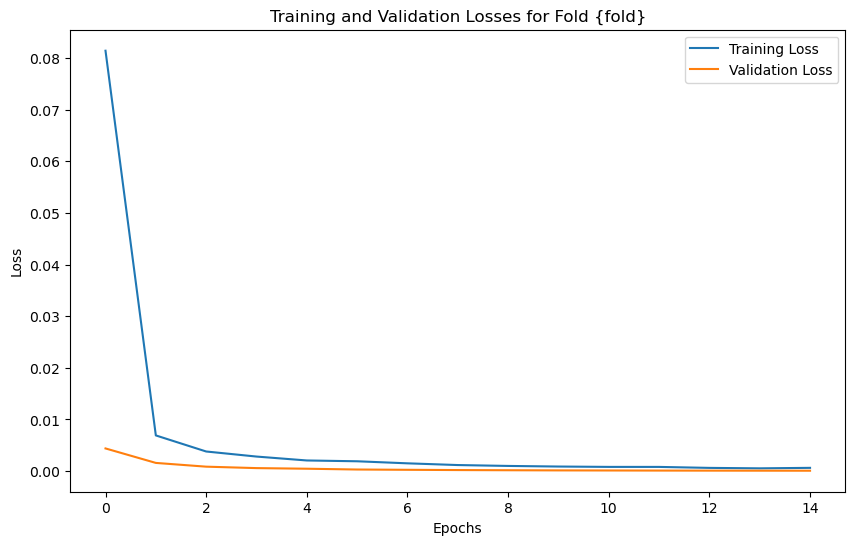

--------------------------------------------------
Training complete. Best Epoch: 15 with Validation Loss: 0.0001
Performance of the best model from fold 3 on the test data: Accuracy = 98.97%
--------------------------------------------------
----------------------------------------------------------------------------------------------------
FOLD 4
----------------------------------------------------------------------------------------------------


Epochs Progress:   7%|▋         | 1/15 [10:08<2:22:00, 608.57s/it]

Epoch 1/15 - Train Loss: 0.0797, Validation Loss: 0.0045


Epochs Progress:  13%|█▎        | 2/15 [20:00<2:09:42, 598.67s/it]

Epoch 2/15 - Train Loss: 0.0064, Validation Loss: 0.0019


Epochs Progress:  20%|██        | 3/15 [29:54<1:59:17, 596.45s/it]

Epoch 3/15 - Train Loss: 0.0044, Validation Loss: 0.0009


Epochs Progress:  27%|██▋       | 4/15 [39:46<1:49:02, 594.78s/it]

Epoch 4/15 - Train Loss: 0.0025, Validation Loss: 0.0006


Epochs Progress:  33%|███▎      | 5/15 [49:40<1:39:05, 594.54s/it]

Epoch 5/15 - Train Loss: 0.0021, Validation Loss: 0.0005


Epochs Progress:  40%|████      | 6/15 [59:32<1:29:03, 593.73s/it]

Epoch 6/15 - Train Loss: 0.0017, Validation Loss: 0.0004


Epochs Progress:  47%|████▋     | 7/15 [1:09:29<1:19:17, 594.70s/it]

Epoch 7/15 - Train Loss: 0.0016, Validation Loss: 0.0003


Epochs Progress:  53%|█████▎    | 8/15 [1:19:35<1:09:47, 598.24s/it]

Epoch 8/15 - Train Loss: 0.0012, Validation Loss: 0.0002


Epochs Progress:  60%|██████    | 9/15 [1:29:36<59:54, 599.14s/it]  

Epoch 9/15 - Train Loss: 0.0010, Validation Loss: 0.0002


Epochs Progress:  67%|██████▋   | 10/15 [1:39:43<50:07, 601.54s/it]

Epoch 10/15 - Train Loss: 0.0010, Validation Loss: 0.0002


Epochs Progress:  73%|███████▎  | 11/15 [1:49:46<40:08, 602.05s/it]

Epoch 11/15 - Train Loss: 0.0008, Validation Loss: 0.0002


Epochs Progress:  80%|████████  | 12/15 [1:59:48<30:06, 602.02s/it]

Epoch 12/15 - Train Loss: 0.0008, Validation Loss: 0.0001


Epochs Progress:  87%|████████▋ | 13/15 [2:09:54<20:06, 603.42s/it]

Epoch 13/15 - Train Loss: 0.0006, Validation Loss: 0.0001


Epochs Progress:  93%|█████████▎| 14/15 [2:20:00<10:04, 604.21s/it]

Epoch 14/15 - Train Loss: 0.0007, Validation Loss: 0.0001


Epochs Progress: 100%|██████████| 15/15 [2:30:07<00:00, 600.51s/it]

Epoch 15/15 - Train Loss: 0.0006, Validation Loss: 0.0001
--------------------------------------------------


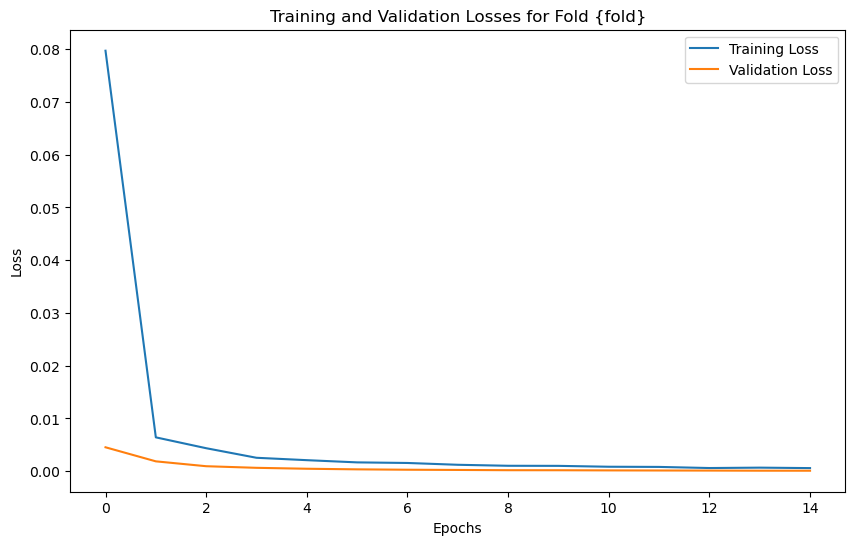

--------------------------------------------------
Training complete. Best Epoch: 15 with Validation Loss: 0.0001
Performance of the best model from fold 4 on the test data: Accuracy = 99.10%
--------------------------------------------------


: 

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from torch.optim.lr_scheduler import StepLR
from sklearn.model_selection import KFold
from tqdm import tqdm


# Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, frames, label_map, transform=None):
        self.frames = frames
        self.label_map = label_map
        self.transform = transform

    def __len__(self):
        return len(self.frames)

    def __getitem__(self, idx):
        frame = self.frames[idx]
        image = Image.open(frame.color_image_path).convert('RGB')
        label = self.label_map[frame.room_label]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

label_map = {label: index for index, label in enumerate(['chess', 'fire', 'heads', 'office', 'pumpkin', 'redkitchen', 'stairs'])}
num_classes = len(label_map) 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = CustomDataset(train_data, label_map, transform=transformations)
test_dataset = CustomDataset(test_data,label_map, transform=transformations)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


n_splits = 5 
num_epochs = 15
dataset_size = len(train_loader.dataset)
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

indices = range(dataset_size)

for fold, (train_idx, val_idx) in enumerate(kfold.split(indices)):
    print("-"*100)
    print(f"FOLD {fold}")
    print("-"*100)
    
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
    validation_subsampler = torch.utils.data.SubsetRandomSampler(val_idx)
    
    train_loader = torch.utils.data.DataLoader(
                      train_loader.dataset, 
                      batch_size=64, sampler=train_subsampler)
    validation_loader = torch.utils.data.DataLoader(
                      train_loader.dataset,
                      batch_size=64, sampler= validation_subsampler)
    
    
    
    model = models.alexnet(pretrained=True)
    model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

    for param in model.features.parameters():
        param.requires_grad = False

    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


    best_val_loss = np.inf
    best_epoch = -1
    best_model_path = f'best_model_fold_{fold}.pth'

    train_losses = []
    val_losses = []

   
    for epoch in tqdm(range(num_epochs), desc="Epochs Progress"):
        model.train()
        train_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in tqdm(validation_loader, desc=f"Validation Epoch {epoch + 1}", leave=False):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        
        val_loss /= len(validation_loader)
        val_losses.append(val_loss)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            torch.save(model.state_dict(), best_model_path)  

        print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    print("-"*50)   
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses for Fold {fold}')
    plt.legend()
    plt.show()

    print("-"*50)
    print(f"Training complete. Best Epoch: {best_epoch+1} with Validation Loss: {best_val_loss:.4f}")
    


    model.load_state_dict(torch.load(best_model_path))
    model.eval()

    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Performance of the best model from fold {fold} on the test data: Accuracy = {accuracy:.2f}%")
    print("-"*50)







In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from torch.optim.lr_scheduler import StepLR
from sklearn.model_selection import KFold
from tqdm import tqdm


class CustomDataset(Dataset):
    def __init__(self, frames, label_map, transform=None):
        self.frames = frames
        self.label_map = label_map
        self.transform = transform

    def __len__(self):
        return len(self.frames)

    def __getitem__(self, idx):
        frame = self.frames[idx]
        image = Image.open(frame.color_image_path).convert('RGB')
        label = self.label_map[frame.room_label]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

label_map = {label: index for index, label in enumerate(['chess', 'fire', 'heads', 'office', 'pumpkin', 'redkitchen', 'stairs'])}
num_classes = len(label_map) 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

test_dataset = CustomDataset(test_data,label_map, transform=transformations)


test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


    
model = models.alexnet(pretrained=True)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

for param in model.features.parameters():
    param.requires_grad = False

model.to(device)

model_paths = [f"best_model_fold_{i}.pth" for i in range(5)] 
state_dicts = [torch.load(path) for path in model_paths]

avg_state_dict = state_dicts[0].copy()  


for key in avg_state_dict.keys():
    avg_state_dict[key] = avg_state_dict[key].zero_()


for state_dict in state_dicts:
    for key in state_dict.keys():
        avg_state_dict[key] += state_dict[key]


for key in avg_state_dict.keys():
    avg_state_dict[key] = avg_state_dict[key] / len(state_dicts)

averaged_model_path = 'averaged_model.pth'
torch.save(avg_state_dict, averaged_model_path)

model.load_state_dict(torch.load(averaged_model_path))   
model.eval()  

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)  #
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


accuracy = 100 * correct / total
print(f'Accuracy of the averaged model on the test set: {accuracy:.2f}%')

c:\Users\aycaaelifaktas\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\aycaaelifaktas\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy of the averaged model on the test set: 13.58%
